 A simple neural network training on the Fashion MNIST dataset following this [TensorFlow turorial](https://www.tensorflow.org/tutorials/keras/basic_classification ) 

The[ Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)  dataset aims to replace the classic MNIST dataset, which is quite overused and not complex enough for modern algorithms. It consists of  70,000  grayscale images of clothing items (training set size is 60,000 and the remaining 10,000 is used for the test set).

There are 10 clothing categories and each article is a 28 by 28 pixels image. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
# Import and load fashion  MNIST data direclty from TensorFlow

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# Explore data

print("Training set: ", train_images.shape)
print("Test set: ", test_images.shape)


Training set:  (60000, 28, 28)
Test set:  (10000, 28, 28)


Each label is an integer (0-9) and corresponds to a class (a category of clothing). The names of the classes can be found here: https://github.com/zalandoresearch/fashion-mnist 

The class names are not included  in the dataset so we need to define them:

In [0]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

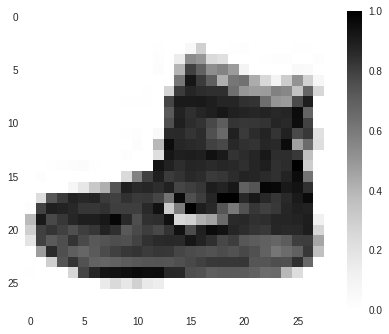

In [89]:
# Check item's range

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Scale 0-255 to 0-1 values for both sets

train_images = train_images / 255.0

test_images = test_images / 255.0


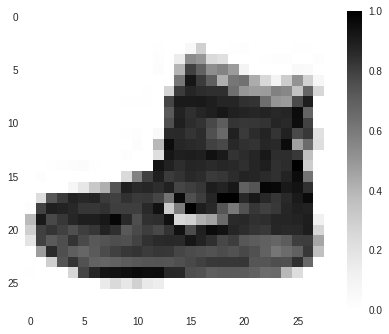

In [13]:
# Check range again

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

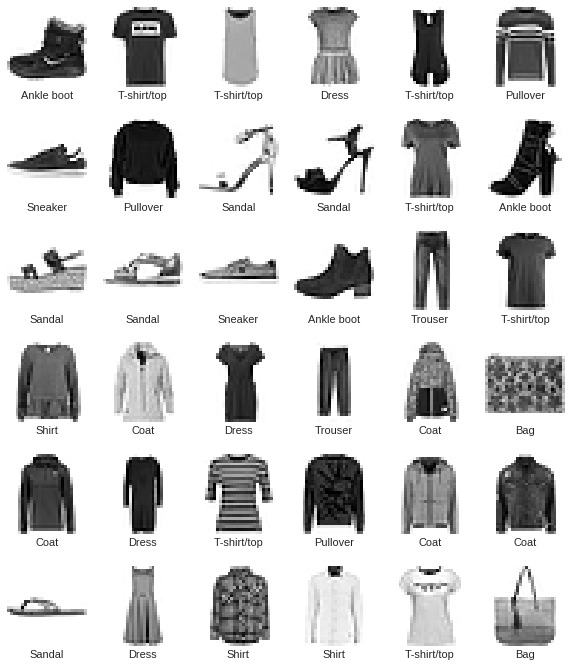

In [29]:
# Display the first 36 images with the corresponding label

plt.figure(figsize=(10,12))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

In [30]:
# Set-up the neural network layers

model = keras.Sequential([
    
    # This layer transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.
    # It has no parameters to learn, it only reformats the data (unstacking rows of pixels in the image and lining them up.)
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # The following are densely-connected, or fully-connected, neural layers. 
   
    # The first Dense layer has 128 nodes (or neurons). Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
    keras.layers.Dense(128, activation=tf.nn.relu),
    
    # The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. 
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Compile the model

model.compile(
              # Optimizer: how the model is updated based on the data it sees and its loss function.
              optimizer='adam',
              
              # Loss function: measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
              loss='sparse_categorical_crossentropy',
              
              # Metrics: monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
              metrics=['accuracy'])

In [32]:
# Start training the model

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.4976 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3746 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3351 - acc: 0.8775
Epoch 4/5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.3111 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2931 - acc: 0.8931


In [37]:
train_loss, train_acc = model.evaluate(train_images, train_labels)

print('Train accuracy:', train_acc)

60000/60000 [==============================] - 3s 46us/sample - loss: 0.2947 - acc: 0.8918
Train accuracy: 0.8918


In [38]:
# Evaluate accuracy on the test dataset

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)



10000/10000 [==============================] - 0s 49us/sample - loss: 0.3734 - acc: 0.8679
Test accuracy: 0.8679


This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

In [0]:
# Once the model is trained, we can make predictions

predictions = model.predict(test_images)

In [49]:
# A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing.

print("For the first image of the test set, return the confidence that the item belongs to each of the 10 classes:\n", predictions[0])


For the first image of the test set, return the confidence that the item belongs to each of the 10 classes:
 [2.4453635e-05 1.0623414e-09 4.0003229e-06 8.6283038e-08 5.9323243e-06
 1.7033708e-01 1.2663480e-04 9.7341903e-02 2.9326990e-04 7.3186672e-01]


In [90]:
# We can see which label has the highest confidence value

print("Predicted label is:", classes[np.argmax(predictions[0])])

# Check is the predicted label corresponds to the true label

print ("True label is:",classes[test_labels[0]])

Predicted label is: Ankle boot
True label is: Ankle boot


In [0]:
# Visualize predictions

green = '#4FC67C'
red = '#DB6B62'

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = green
  else:
    color = red
  
  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color(red)
  thisplot[true_label].set_color(green) 

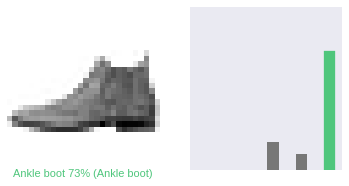

In [84]:
# Predict again for the 1st image

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

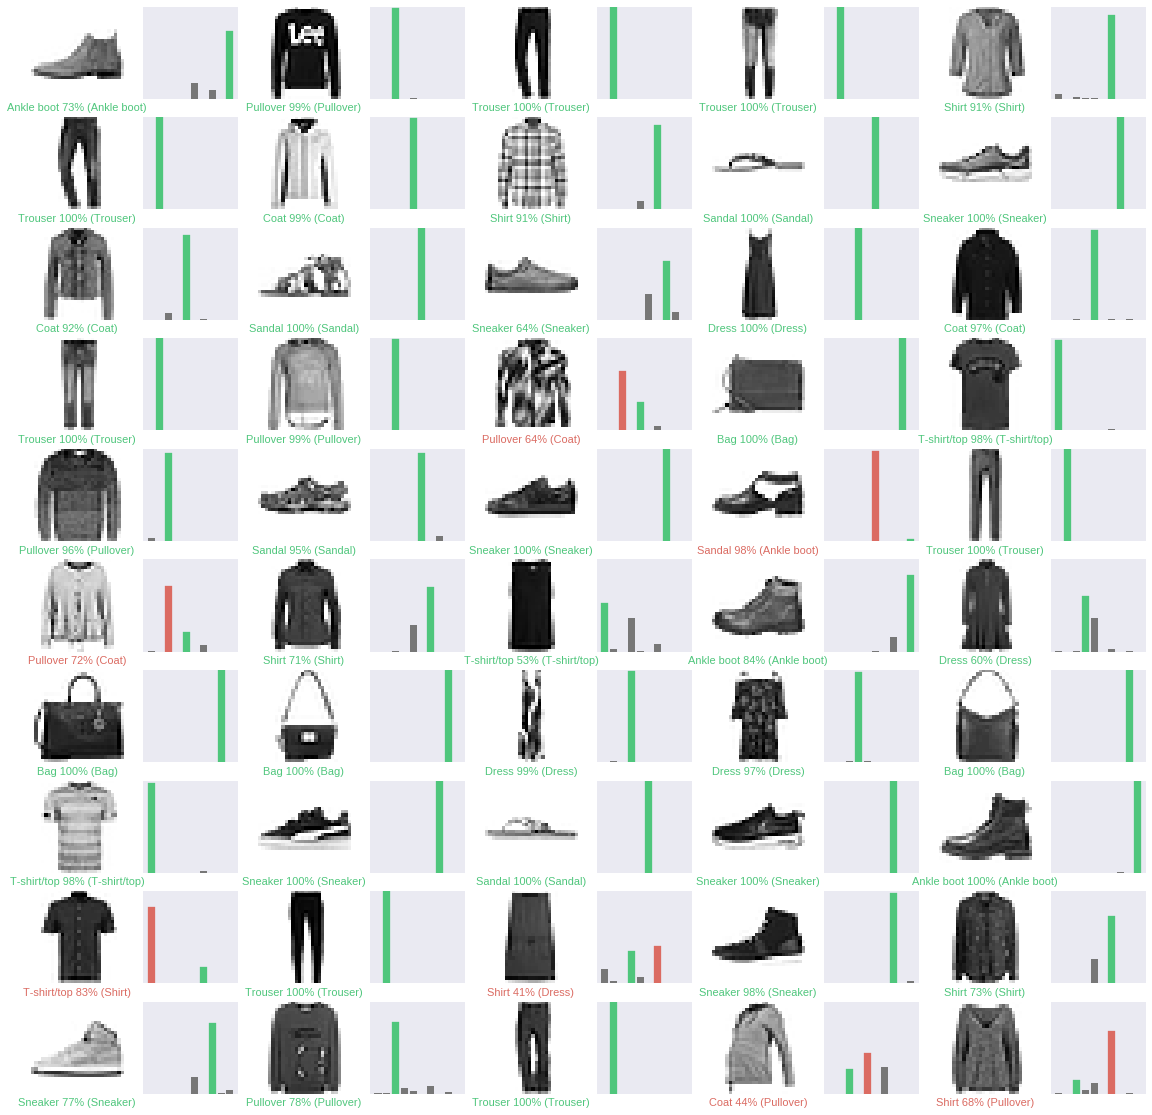

In [82]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red

num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(1, 28, 28)
[[7.9697784e-04 1.2971811e-06 6.4293754e-01 6.7377019e-05 3.0576527e-01
  2.3746391e-07 5.0239354e-02 4.3633563e-08 1.9144494e-04 3.7384009e-07]]


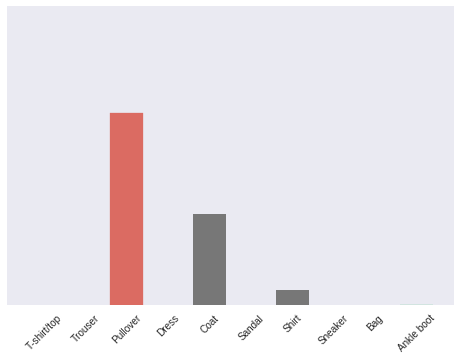

In [85]:
# Make prediction about a single image

img = test_images[17]

# Even though we're using a single image, we need to add it to a list because tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
# Here we add the image to a batch where it's the only member

img = (np.expand_dims(img,0))

print(img.shape)

# Predict

predictions_single = model.predict(img)

print(predictions_single)

# Plot

plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), classes, rotation=45)
plt.show()